<a href="https://colab.research.google.com/github/luisangel22091102/TAREAS-DE-METODOS-DE-SIMULACION/blob/main/TAREA_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

**TAREA 1**


Implemente la función representativa del sistema en lenguaje Python. Tenga en cuenta que la variable de estado sería un ndArray de 3 dimensiones. Por otra parte, la función recibe los parámetros de entrada entrada σ,ρ,β.

In [ ]:
import numpy as np
from scipy.integrate import odeint

def solve_lorenz(state, t, σ, ρ, β):
    x, y, z = state
    dxdt = σ * (y - x)
    dydt = x * (ρ - z) - y
    dzdt = x * y - β * z
    return [dxdt, dydt, dzdt]

initial_state = (1., 1., 1.)

σ, ρ, β = 10, 28, 8/3
t = 1

result = solve_lorenz(initial_state, t, σ, ρ, β)

print("Resultado para t=1:", result)


Resultado para t=1: [0.0, 26.0, -1.6666666666666665]


**TAREA 2**


Escriba el código correspondiente a la simulación de este sistema para un intervalo de tiempo t ∈ [0, 100] que contenga 3000 valores
equidistantes. Además utilice los parámetros σ = 10 ρ = 28 β = 8/3 y el vector de condiciones iniciales (1,1,1). Emplee para ello la
función odeint.

Valores equidistantes de t: 3000


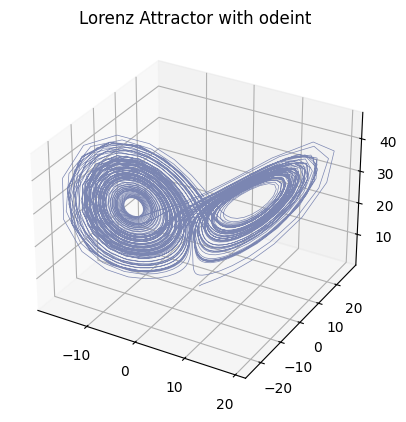

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos la función que describe las ecuaciones diferenciales de Lorenz
def solve_lorenz(state, t, σ, ρ, β):
    x, y, z = state
    dxdt = σ * (y - x)
    dydt = x * (ρ - z) - y
    dzdt = x * y - β * z
    return [dxdt, dydt, dzdt]

# Condiciones iniciales y parámetros
initial_state = (1., 1., 1.)
σ, ρ, β = 10, 28, 8/3


t = np.linspace(0, 100, 3000)


print('Valores equidistantes de t:', t.size)


states = odeint(solve_lorenz, initial_state, t, args=(σ, ρ, β))


xs = states[:, 0]
ys = states[:, 1]
zs = states[:, 2]

ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5, c='#7B86B2')
ax.set_title("Lorenz Attractor with odeint")


plt.show()


**TAREA 3**


Cree una gráfica en 3 dimensiones que utilice la paleta de colores llamada plt.cm. plasma para representar la solución la cual deberá de tener
una forma similar a la Figura 1.

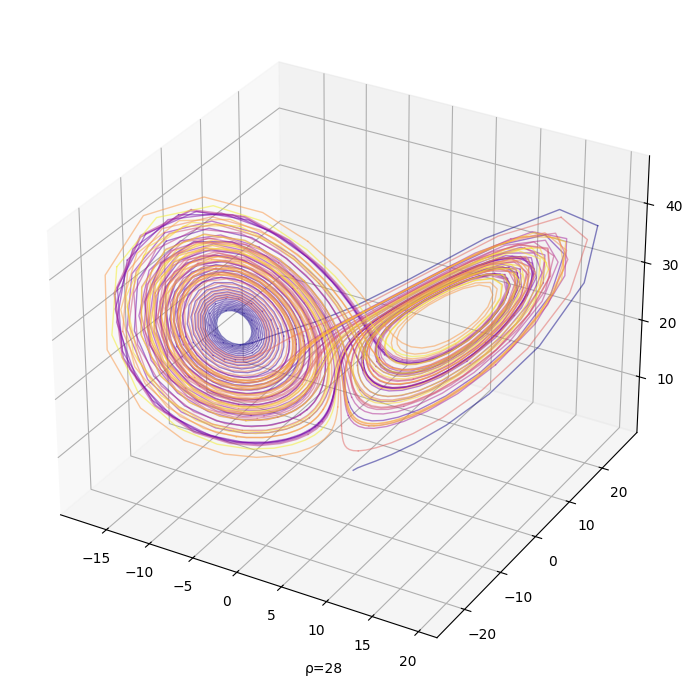

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos la función que describe las ecuaciones diferenciales de Lorenz
def solve_lorenz(state, t, σ, ρ, β):
    x, y, z = state
    dxdt = σ * (y - x)
    dydt = x * (ρ - z) - y
    dzdt = x * y - β * z
    return [dxdt, dydt, dzdt]

# Función para generar el atractor de Lorenz
def lorenz_attractor(state0, parameters, ax=None, text_offset=0.01):
    σ, ρ, β = parameters
    n = 3000
    t = np.linspace(0, 100, n)

    # Resolvemos las ecuaciones para la secuencia de puntos t
    states = odeint(solve_lorenz, state0, t, args=(σ, ρ, β))
    xs = states[:, 0]
    ys = states[:, 1]
    zs = states[:, 2]

    if ax is None:
        ax = plt.figure(figsize=(7, 8)).add_subplot(projection='3d')

    # Colormap 'plasma'
    cmap = plt.cm.plasma

    # Intervalos de 10 unidades de ancho
    s = 10

    # Iteramos en estos intervalos aplicando el colormap correspondiente
    for i in range(0, n - s, s):
        ax.plot(xs[i:i+s+1], ys[i:i+s+1], zs[i:i+s+1], color=cmap(i/n), alpha=0.5, lw=1)

    ax.text2D(0.44, text_offset, f"ρ={ρ}", transform=ax.transAxes)
    ax.figure.tight_layout()
    return ax.figure

# Condiciones iniciales y parámetros para el atractor de Lorenz
lorenz_attractor((1, 1, 1), (10, 28, 8/3)).show()


**TAREA 4**


Solucione el mismo problema con los mismos parámetros a excepción de rho el cual tomara los valores -42,15,28 y 100. Almacene las respuestas en dos listas, una para el parametro rho y la otra para la solucion correspondiente.

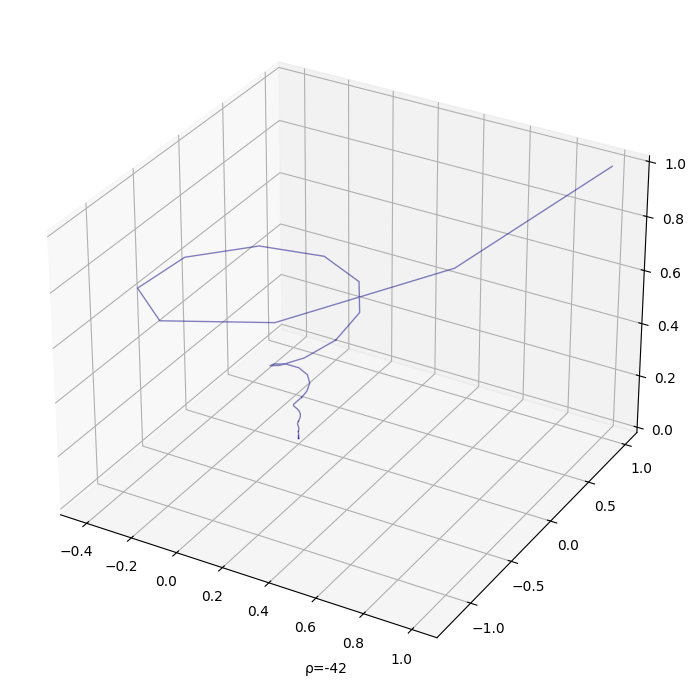

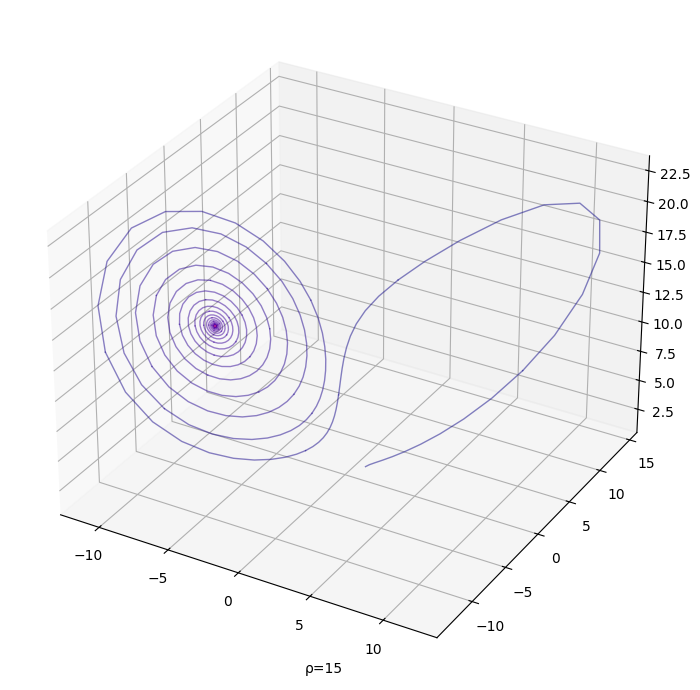

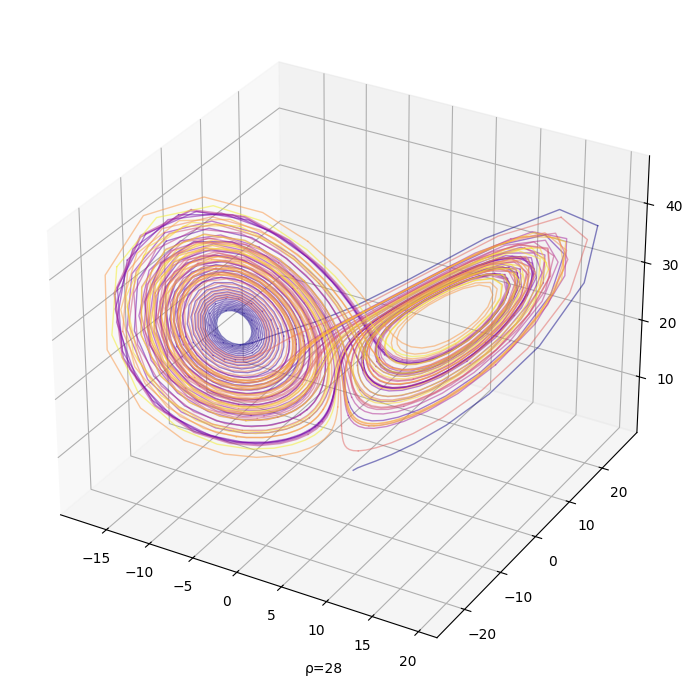

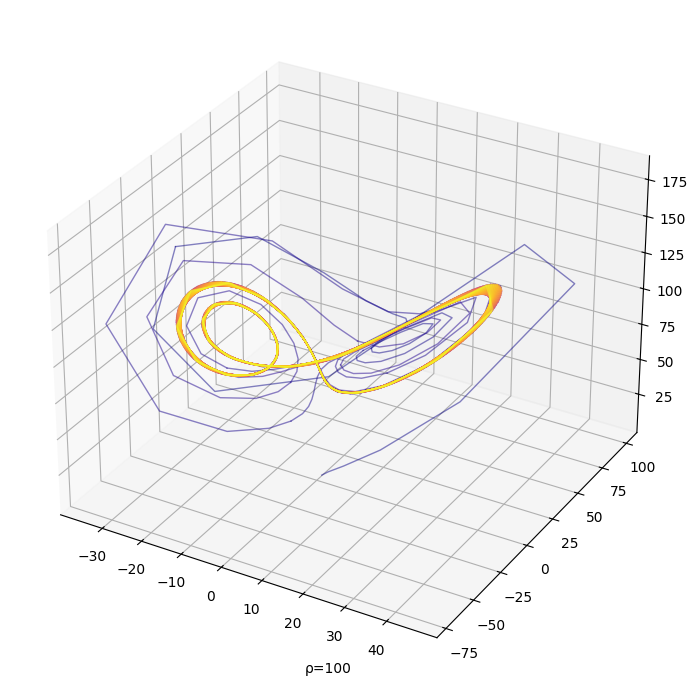

In [ ]:
# Parámetros rho que vamos a usar para generar distintas soluciones
rho_values = [-42, 15, 28, 100]

# Usamos una lista para almacenar las soluciones con distintos valores de rho
solutions = [lorenz_attractor((1, 1, 1), (10, rho, 8/3)) for rho in rho_values]

# Iteramos sobre las soluciones y las mostramos
for solution in solutions:
    solution.show()

**TAREA 5**
Cree gráficas de 3 dimensiones para representar cada solución, todas en la misma figura. Para ello cree una figura de 2 filas y 2 columnas.
Coloque en el texto del título de la gráfica el parámetro rho igualado a el valor correspondiente en cada caso. Garantice que la figura tenga un
tamaño de 10 × 10

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def solve_lorenz(state, t, σ, ρ, β):
    x, y, z = state
    dxdt = σ * (y - x)
    dydt = x * (ρ - z) - y
    dzdt = x * y - β * z
    return [dxdt, dydt, dzdt]

def lorenz_attractor(state0, parameters, ax=None, text_offset=0.01):
    σ, ρ, β = parameters
    n = 3000
    t = np.linspace(0, 100, n)

    states = odeint(solve_lorenz, state0, t, args=(σ, ρ, β))
    xs = states[:, 0]
    ys = states[:, 1]
    zs = states[:, 2]

    if ax is None:
        ax = plt.figure(figsize=(7, 8)).add_subplot(projection='3d')

    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_title(f"ρ = {ρ}")
    ax.text2D(0.44, text_offset, f"ρ = {ρ}", transform=ax.transAxes)

    return ax.figure


In [ ]:
fsize = (15, 15)
ndim = 8
def butterfly(ax, colormap, rho, angle):
 tmax = 100
 n = 10000
 sigma, rho, beta = (10, rho, 2.667)
 u0, v0, w0 = (0, 1, 1.05)
 t = np.linspace(0, tmax, n)
 soln = odeint(solve_lorenz, (u0, v0, w0), t, args=(sigma, rho, beta))

 # Interpolate solution onto the time grid, t.
 x, y, z = soln[:, 0], soln[:, 1], soln[:, 2]
 ax.set_facecolor('k')
 s = 10
 cmap = getattr(plt.cm, colormap)
 for i in range(0,n-s,s):
 ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

 # Remove all the axis clutter, leaving just the curve.
 ax.set_axis_off()
 ax.view_init(angle, angle)
 axs = plt.figure(facecolor='k', figsize=fsize).subplots(ndim, ndim, subplot_kw = dict(projection='3d'))
for i, (row, col) in enumerate(np.ndindex((ndim, ndim))):
  butterfly(axs[row, col], plt.colormaps()[i], rho=2.5*i, angle=10*i)